## Ejercicio 06: Comparación de modelos

Instrucciones:

En la semana 3 se trabajó con el uso de diferentes arquitecturas de Procesamiento de Lenguaje natural utilizando Word Embeddings (Palabras incrustadas) y redes neuronales. Se utilizaron 3 modelos / arquitecturas distintas para analizar textos largos (DNN, CNN, y LSTM, cuyo significado es redes neuronales profundas, redes convolucionales, y memorias a corto y largo plazo respectivamente)

En clase se trabajó especificamente con modelos de pocas capas, y algunas configuraciones como 5-Gramas para la red CNN, 128 Filtros para la red LSTM, 128 Filtros para la capa Convolucional en la red CNN, etc... Todos estos parámetros son modificables, y pueden tener valores diferentes a los mencionados, es por ello que se conocen como parámetros de aprendizaje de la red neuronal. Además de ello, se mencionó el uso de hiperparámetros como son el número de épocas (Epoch), la cantidad de ejemplos que se usan para entrenar por época (batch size), los cuales se conocen como hiperparámetros de la red neuronal.

Este ejercicio consistirá en implementar nuevamente las 3 arquitecturas vistas en clase, y modificar estos valores para intentar llegar al mejor resultado posible en cada uno de ellos, es decir, obtener el máximo valor de eficiencia que sea posible, y el mínimo de error.

- Utilizando el mismo dataset de análisis de sentimientos con opiniones sobre películas, y el mismo código del caso de estudio, modificar los valores de diferentes parámetros e hiperparámetros de los modelos.

- Si se considera necesario, se puede realizar algún proceso adicional de preprocesamiento de la información para tratar de mejorar el rendimiento de las redes neuronales.

- En una nueva celda, al final, imprimir loas 3 gráficas de accuracy obtenidas (Recuerda no osbreescribir los valores de los 3 gráficos para que puedas llamar a los 3 en esta última celda)

- Escribir en una celda adicional los experimientos que se realizaron, así como las observaciones obtenidas, por ejemplo: "Reduciendo el número de N-Gramas de 5 a 3 descubrí que se mejoró / empeoró el rendimiento, sin embargo, cuando utilicé bigramas (2-gramas) el resultado fue..." ó "Decidí aumentar el número de épocas a 300 y observé que en las primeras 50 el accuracy subió tanto para train como para test, sin embargo, después de la época 50..."

- Finalmente escribir una breve conclusión de todo lo observado, por ejemplo, "En mi opinión el mejor modelo es.... porque...", "Parece ser que mientras más pequeño / grande sea el valor de... mejor / peor se comporta la red"

Tips: Puedes buscar en internet información o artículos de cualquier cosa que necesites saber un poco más, por ejemplo, cómo funciona el Batch Size, cómo puede afectar el número de épocas en una red neuronal, etc.

Mucho éxito. Una vez que finalices este ejercicio, estarás listo para comenzar a implementar modelos avanzados de Procesamiento de Lenaguaje Natural, entendiendo mejor cómo funcionan y cómo puedes mejorarlos, en otras palabras, comenzarás a ser un diseñador de PLN.

NOTA: Recuerda que la clasificación de textos como se hace en este ejercicio, será la base para el desarrollo de clasificaciones multiclase, y ChatBots. :)

In [26]:
# Importar todas las librerías que se utilizarán
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, Conv1D, LSTM, GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

import matplotlib.pyplot as plt

In [27]:
# Leemos el archivo y mostramos los primeros elementos para verificar
# que sean los correctos
movie_reviews = pd.read_csv("Peliculas_Reseñas_10000.csv")
# Verificar que no existan valore nulos
print("Existen valores nulos:")
print(movie_reviews.isnull().values.any())
movie_reviews.head(10)

Existen valores nulos:
False


,original,sentimiento,reseña
0,One of the other reviewers has mentioned that ...,positive,Uno de los otros críticos han mencionado que d...
1,A wonderful little production. <br /><br />The...,positive,Una producción pequeña y maravillosa. <br /> <...
2,I thought this was a wonderful way to spend ti...,positive,Pensé que esto era una maravillosa manera de p...
3,Basically there's a family where a little boy ...,negative,Básicamente hay una familia en la que un niño ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei de ""amor en los tiempos del dine..."
5,"Probably my all-time favorite movie, a story o...",positive,Probablemente mi película favorita de todos lo...
6,I sure would like to see a resurrection of a u...,positive,Estoy seguro que le gustaría ver una resurrecc...
7,"This show was an amazing, fresh & innovative i...",negative,"Este espectáculo fue una increíble, fresca y i..."
8,Encouraged by the positive comments about this...,negative,Alentados por los comentarios positivos sobre ...
9,If you like original gut wrenching laughter yo...,positive,Si te gusta la risa desgarradora original que ...


In [28]:
# Imprimimos uno de los ejemplos para revisar su escritura
movie_reviews["reseña"][300]

'"Mararía" realmente me decepcionó. No puedo considerarlo como una mala película, pero el desarrollo simplemente parecía demasiado apresurado y no creíble para que evocan las emociones. El Dr. Fermín muestra un comportamiento extraño sin precedentes de una pasión que no se puede comprender realmente donde nació de. Quiero decir, ¿cuántas veces alguna vez tiene una conversación con Mararía ?? ¿Talvez una vez? Además, Mararía no parecía ser un personaje real, en vez más como un estereotipo película que sólo tenía que estar en la película (... o bien otro título que se necesitaba?). Algunos de la mejor actuación vinieron de un papel que no era realmente importante para la historia, la de Marcial, el borracho sub-inteligente y humilde. Por supuesto, el paisaje, las curiosidades culturales de las Islas Canarias, y otros momentos "wow" eran interesantes, pero la película estuvieron a la altura de un documental (en caso de que ésta era su intención real), y lo más importante, como un drama só

<BarContainer object of 2 artists>

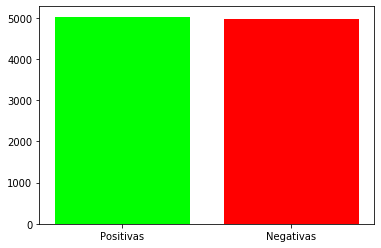

In [29]:
# Ver la distribución que tenemos de los datos 
Pos = 0
Neg = 0

for Sentiment in movie_reviews["sentimiento"]:
    if(Sentiment == 'positive'):
        Pos += 1
    else:
        Neg += 1

plt.bar(['Positivas', 'Negativas'], [Pos, Neg], color = ['lime', 'red'])

In [30]:
# Filtrado de StopWords utilizando NLTK
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import stopwords

stop_words = set(stopwords.words('spanish'))

X = []

removedor_tags = re.compile(r'<[^>]+>')

sentences = list(movie_reviews['reseña'])
for sen in sentences:
    
    # Filtrado de stopword
    for stopword in stop_words:
        sentence = sen.replace(" " + stopword + " ", " ")
            
    # Remover los elementos de HTML (Que aparecen en los comentarios)
    sentence = removedor_tags.sub('', sentence)
    # Remover espacios múltiples
    sentence = re.sub(r'\s+', ' ', sentence)
    # Convertir todo a minúsculas
    sentence = sentence.lower()
    # Filtrado de signos de puntuación
    tokenizer = RegexpTokenizer(r'\w+')
    # Tokenización del resultado (Aplicando el rechazo de tokens descrito)
    result = tokenizer.tokenize(sentence)
    # Agregar al arreglo los textos "destokenizados" (Como texto nuevamente)
    X.append(TreebankWordDetokenizer().detokenize(result))

In [31]:
# Filtrado de más StopWords (Definidas por el usuario)
New_StopWords = ['a','acá','ahí','al','algo','algún','alguna','alguno','algunas','algunos','allá','allí','ambos','ante',
                 'antes','aquel','aquella','aquello','aquellas','aquellos','aquí','arriba','así','atrás','aun','aunque',
                 'bien','cada','casi','como','con','cual','cuales','cualquier','cualquiera','cuan','cuando','cuanto','cuanta',
                 'cuantos','cuantas','de','del','demás','desde','donde','dos','el','él','ella','ello','ellas','ellos','en',
                 'eres','esa','ese','eso','esas','esos','esta','esto','estas','estos','este','etc','ha','hasta','la','lo','las',
                 'los','me','mi','mis','mía','mías','mío','míos','mientras','muy','ni','nosotras','nosotros','nuestra',
                 'nuestro','nuestras','nuestros','os','otra','otro','otras','otros','para','pero','pues','que','qué','si','sí',
                 'siempre','siendo','sin','sino','so','sobre','sr','sra','sres','sta','su','sus','te','tu','tus','un','una',
                 'uno','unas','unos','usted','ustedes','vosotras','vosotros','vuestra','vuestro','vuestras','vuestros','y','ya',
                 'yo']

for i in range(len(X)):
    for element in New_StopWords:
        X[i] = X[i].replace(" " + str(element) + " ", " ")

print("Textos sin StopWords:")
X

Textos sin StopWords:


['uno críticos han mencionado después ver sólo 1 episodio oz estará enganchado tienen razón es exactamente sucedió conmigo primero llamó atención oz fue brutalidad escenas inquebrantable violencia conjunto derecha principio confía mí es espectáculo débiles corazón o tímida espectáculo tira golpes respecto drogas sexo o violencia es incondicional uso clásico palabra se llama oz es apodo dado estado penitentary oswald máxima seguridad se centra principalmente ciudad esmeralda sección experimental prisión todas células tienen frentes cristal cara hacia interior por privacidad es prioridad agenda em city es hogar many aryans musulmanes gangstas latinos cristianos italianos irlandeses más por tanto enfrentamientos miradas muerte relaciones poco fiables acuerdos turbios nunca están lejos diría principal atractivo serie se debe hecho va espectáculos se atreverían olvidar bonitos cuadros pintados por público mayoritario olvidar encanto olvidar romance oz hace perder tiempo primer episodio he v

In [32]:
# Creación del vector objetivo (Postivo / Negativo)
Sent = movie_reviews['sentimiento']

y = []
for Sentimiento in Sent:
    if Sentimiento == "positive":
        y.append(1)
    else:
        y.append(0)
print("Vector de objetivos:")
print(y)

Vector de objetivos:
[1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 

In [33]:
# Separación de la información en conjuntos de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Preparamos la capa de embeddingsn(Predefinimos una cantidad de
# 5000 palabras consideradas como tokens
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

# Transforma cada texto en una secuencia de valores enteros
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

print(X_train)
print(y_train)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [34]:
print(X_train[0])
print(len(X_train[2]))
#print(y_train)

[3649, 633, 6, 431, 9, 1, 205, 182, 2, 34, 43, 2227, 34, 89, 567, 434, 556, 895, 69, 84, 4070, 551, 35, 935, 15, 8, 798, 128, 1, 140, 398, 34, 43, 41, 39, 10, 1, 17, 115, 115, 115, 14, 226, 17, 226, 4, 104, 3507, 2973, 1115, 2643, 379, 8, 1211, 3, 664]
85


In [35]:
# Conversión de los conjuntos de entrenamiento a vectores 
maxlen = 100

# Aquellos mayores a 100 son truncados, y los menores les 
# es replicado su último valor para tener arreglos
# bidimensionales del mismo tamaño
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [36]:
# Verificar que la información de entrada 
print(X_train)
print(y_train)

[[3649  633    6 ...    0    0    0]
 [   1   57  113 ...  710 3020  139]
 [ 690 3650  175 ...    0    0    0]
 ...
 [  72   88   20 ...   31  847 3590]
 [1728  199  111 ...    0    0    0]
 [2586   33  477 ...    0    0    0]]
[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 

## Declaración de Word2Vect

In [14]:
# Declaración de librerías para manejo de arreglos (Numpy)
from numpy import asarray
from numpy import zeros

# Lectura del archivo de embeddings
embeddings_dictionary = dict()
Embeddings_file = open('Word2Vect_Spanish.txt', encoding="utf8")

# Extraemos las características del archivo de embeddings
# y las agregamos a un diccionario (Cada elemento es un vextor)
for linea in Embeddings_file:
    caracts = linea.split()
    palabra = caracts[0]
    vector = asarray(caracts[1:], dtype='float32')
    embeddings_dictionary [palabra] = vector
Embeddings_file.close()

In [38]:
# Extraemos la cantidad de palabras en el vocabulario
vocab_size = len(tokenizer.word_index) + 1

# Generamos la matriz de embeddings (De entrada)
embedding_matrix = zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    # Extraemos el vector de embedding para cada palabra
    embedding_vector = embeddings_dictionary.get(word)
    # Si la palbra si existía en el vocabulario
    # agregamos su vector de embeddings en la matriz
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

## Arquitectura de la red DNN

In [42]:
# Definimos las capas de nuestro modelo neuronal (DNN)
# Definimos que el modelo será secuencial (Y que ingresaremos cada capa en el orden de configuración de la red)
model_dnn = Sequential()
# Definimos los valores para nuestra capa de Embeddings
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=maxlen, trainable=False)
# Agregamos al modelo 3 capas (La de Embeddings, una de aplanamiento y una Profunda con una Dense con una salida
# y una activación Sigmoindal)
model_dnn.add(embedding_layer)
model_dnn.add(Dense(64, activation='sigmoid'))
model_dnn.add(Dense(32, activation='sigmoid'))
model_dnn.add(Dense(16, activation='sigmoid'))
model_dnn.add(Flatten())
model_dnn.add(Dense(1, activation='sigmoid'))
# Definimos métodos de optimización, que métrica se utilizará y como calcular la pérdida
model_dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# Para ver la configuración que definimos
print(model_dnn.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 300)          16600800  
_________________________________________________________________
dense_14 (Dense)             (None, 100, 64)           19264     
_________________________________________________________________
dense_15 (Dense)             (None, 100, 32)           2080      
_________________________________________________________________
dense_16 (Dense)             (None, 100, 16)           528       
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 1601      
Total params: 16,624,273
Trainable params: 23,473
Non-trainable params: 16,600,800
_____________________________________

In [43]:
# Utilizamos el método fit para ajustar los datos de nuestro modelo a la configuración que definimos
history_dnn = model_dnn.fit(X_train, y_train, batch_size=10, epochs=20, verbose=1, validation_split=0.2)
# Utilizamos evaluate para determinar la pérdida y el accuracy de nuestro modelo
score_dnn = model_dnn.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", score_dnn[0])
print("Test Accuracy:", score_dnn[1])

Train on 6399 samples, validate on 1600 samples
Epoch 1/20
6399/6399 [==============================] - 6s 995us/step - loss: 0.7061 - acc: 0.5024 - val_loss: 0.6922 - val_acc: 0.5200
Epoch 2/20
6399/6399 [==============================] - 6s 892us/step - loss: 0.6942 - acc: 0.5073 - val_loss: 0.6923 - val_acc: 0.5200
Epoch 3/20
6399/6399 [==============================] - 6s 926us/step - loss: 0.6935 - acc: 0.5002 - val_loss: 0.6942 - val_acc: 0.4800
Epoch 4/20
6399/6399 [==============================] - 6s 887us/step - loss: 0.6937 - acc: 0.4905 - val_loss: 0.6935 - val_acc: 0.4800
Epoch 5/20
6399/6399 [==============================] - 6s 905us/step - loss: 0.6933 - acc: 0.5009 - val_loss: 0.6946 - val_acc: 0.4800
Epoch 6/20
6399/6399 [==============================] - 6s 928us/step - loss: 0.6932 - acc: 0.5015 - val_loss: 0.6922 - val_acc: 0.5200
Epoch 7/20
6399/6399 [==============================] - 6s 920us/step - loss: 0.6933 - acc: 0.4979 - val_loss: 0.6931 - val_acc: 0.5231


In [ ]:
# Notas:
# Se agregaron tres capas ocultas (Dense de 64, 32 y 16) neuronas cada una
# Se subió el número de épocas a 20
# Se redujo el Batch Size a 10

## Arquitectura de la red CNN

In [64]:
# Declaración de modelo Secuencial 
model_cnn = Sequential()

# Declaración de las capas del modelo convolucional
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model_cnn.add(embedding_layer)
model.add(Dropout(0.3, input_shape=(vocab_size,)))
model_cnn.add(Conv1D(128, 2, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(1, activation='sigmoid'))
# Impresión de parámetros del modelo
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model_cnn.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 100, 300)          16600800  
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 99, 128)           76928     
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 128)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 129       
Total params: 16,677,857
Trainable params: 77,057
Non-trainable params: 16,600,800
_________________________________________________________________
None


In [65]:
# Utilizamos el método fit para ajustar los datos de nuestro modelo a la configuración que definimos
history_cnn = model_cnn.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1, validation_split=0.2)
# Utilizamos evaluate para determinar la pérdida y el accuracy de nuestro modelo
score_cnn = model_cnn.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score_cnn[0])
print("Test Accuracy:", score_cnn[1])

Train on 6399 samples, validate on 1600 samples
Epoch 1/10
6399/6399 [==============================] - 14s 2ms/step - loss: 0.5359 - acc: 0.7443 - val_loss: 0.4051 - val_acc: 0.8294
Epoch 2/10
6399/6399 [==============================] - 16s 3ms/step - loss: 0.3777 - acc: 0.8372 - val_loss: 0.3610 - val_acc: 0.8550
Epoch 3/10
6399/6399 [==============================] - 15s 2ms/step - loss: 0.3117 - acc: 0.8706 - val_loss: 0.3454 - val_acc: 0.8506
Epoch 4/10
6399/6399 [==============================] - 14s 2ms/step - loss: 0.2572 - acc: 0.9026 - val_loss: 0.3330 - val_acc: 0.8581
Epoch 5/10
6399/6399 [==============================] - 13s 2ms/step - loss: 0.2157 - acc: 0.9214 - val_loss: 0.3324 - val_acc: 0.8625
Epoch 6/10
6399/6399 [==============================] - 15s 2ms/step - loss: 0.1766 - acc: 0.9403 - val_loss: 0.3252 - val_acc: 0.8700
Epoch 7/10
6399/6399 [==============================] - 15s 2ms/step - loss: 0.1387 - acc: 0.9594 - val_loss: 0.3275 - val_acc: 0.8719
Epoch 8

In [ ]:
# Notas:
# Se cambió el uso de Bi-Gramas de 5 a 2
# Se agrega una capa de Dropout al 30%
# Se redujo el Batch Size a 10

## Arquitectura de la red LSTM

In [55]:
# Declaración de modelo Secuencial 
model_lstm = Sequential()

# Declaración de las capas del modelo LSTM
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model_lstm.add(embedding_layer)
model_lstm.add(LSTM(100))
model_lstm.add(Dense(1, activation='sigmoid'))

# Impresión de parámetros del modelo
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model_lstm.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 100, 300)          16600800  
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 101       
Total params: 16,761,301
Trainable params: 160,501
Non-trainable params: 16,600,800
_________________________________________________________________
None


In [56]:
# Utilizamos el método fit para ajustar los datos de nuestro modelo a la configuración que definimos
history_lstm = model_lstm.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)
# Utilizamos evaluate para determinar la pérdida y el accuracy de nuestro modelo
score_lstm = model_lstm.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score_lstm[0])
print("Test Accuracy:", score_lstm[1])

Train on 6399 samples, validate on 1600 samples
Epoch 1/20
6399/6399 [==============================] - 30s 5ms/step - loss: 0.6657 - acc: 0.5727 - val_loss: 0.5734 - val_acc: 0.7081
Epoch 2/20
6399/6399 [==============================] - 30s 5ms/step - loss: 0.5806 - acc: 0.7070 - val_loss: 0.4919 - val_acc: 0.7919
Epoch 3/20
6399/6399 [==============================] - 30s 5ms/step - loss: 0.5231 - acc: 0.7504 - val_loss: 0.4828 - val_acc: 0.7950
Epoch 4/20
6399/6399 [==============================] - 30s 5ms/step - loss: 0.4753 - acc: 0.7815 - val_loss: 0.4260 - val_acc: 0.7975
Epoch 5/20
6399/6399 [==============================] - 32s 5ms/step - loss: 0.4555 - acc: 0.7914 - val_loss: 0.4583 - val_acc: 0.8294
Epoch 6/20
6399/6399 [==============================] - 30s 5ms/step - loss: 0.4642 - acc: 0.7917 - val_loss: 0.4023 - val_acc: 0.8319
Epoch 7/20
6399/6399 [==============================] - 32s 5ms/step - loss: 0.4363 - acc: 0.7979 - val_loss: 0.4076 - val_acc: 0.8344
Epoch 8

In [ ]:
# Notas:
# Se bajaron los filtros LSTM a 32

## Resultados de todas las redes

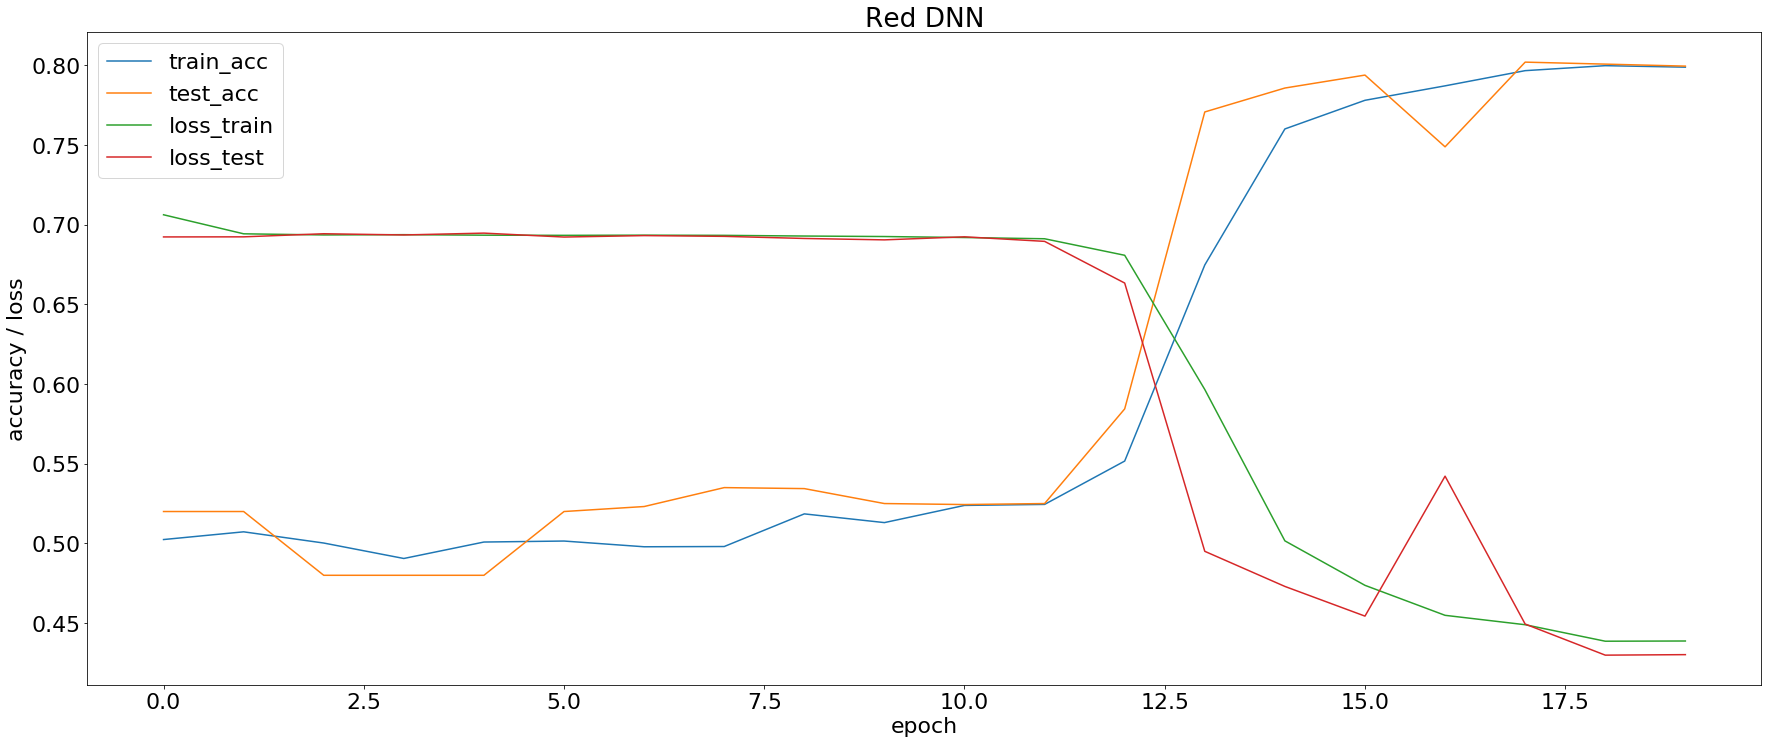

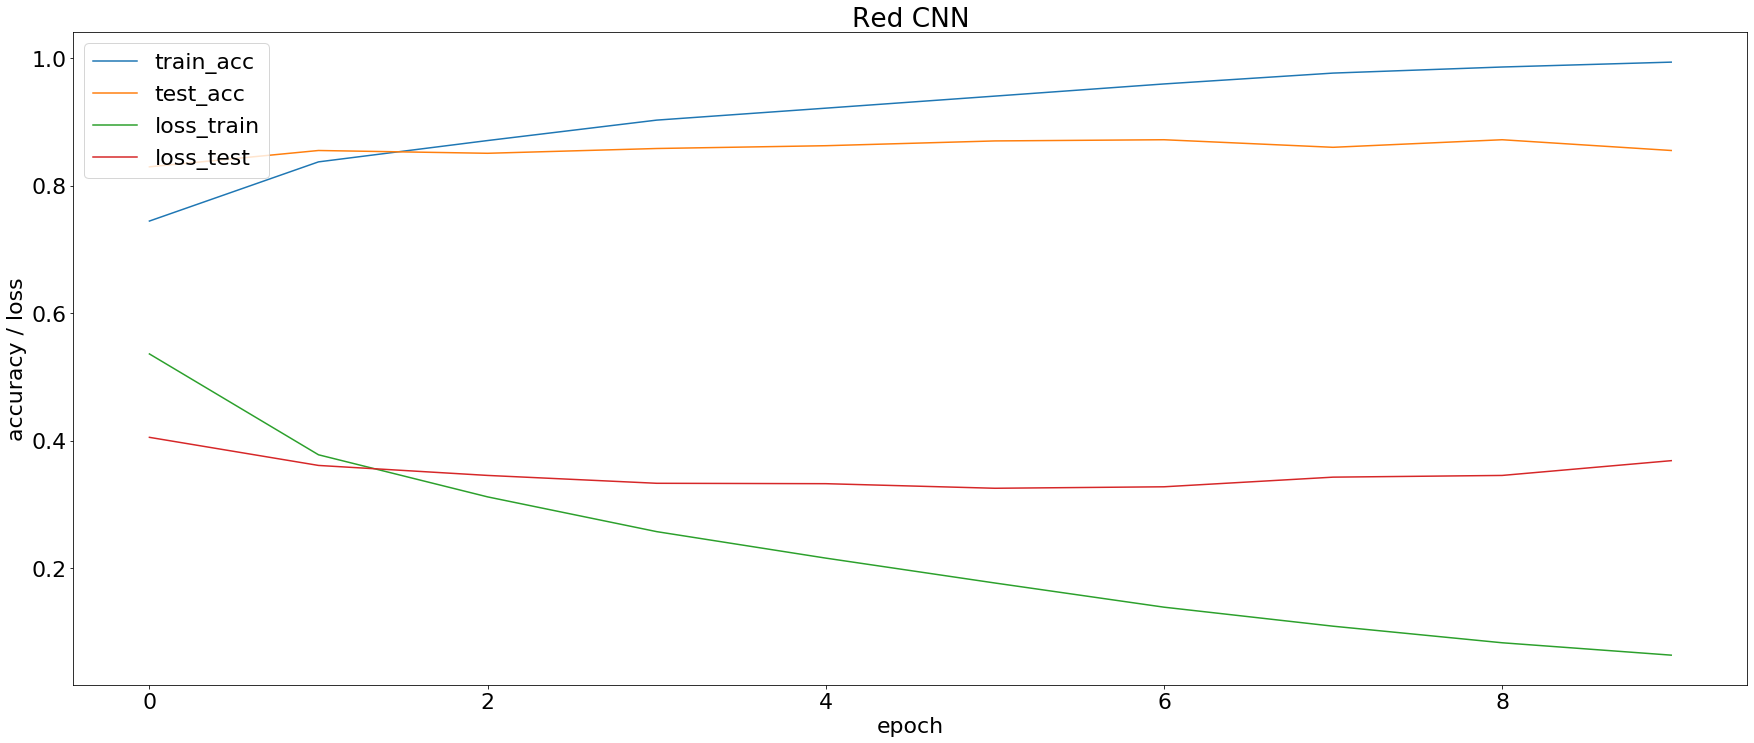

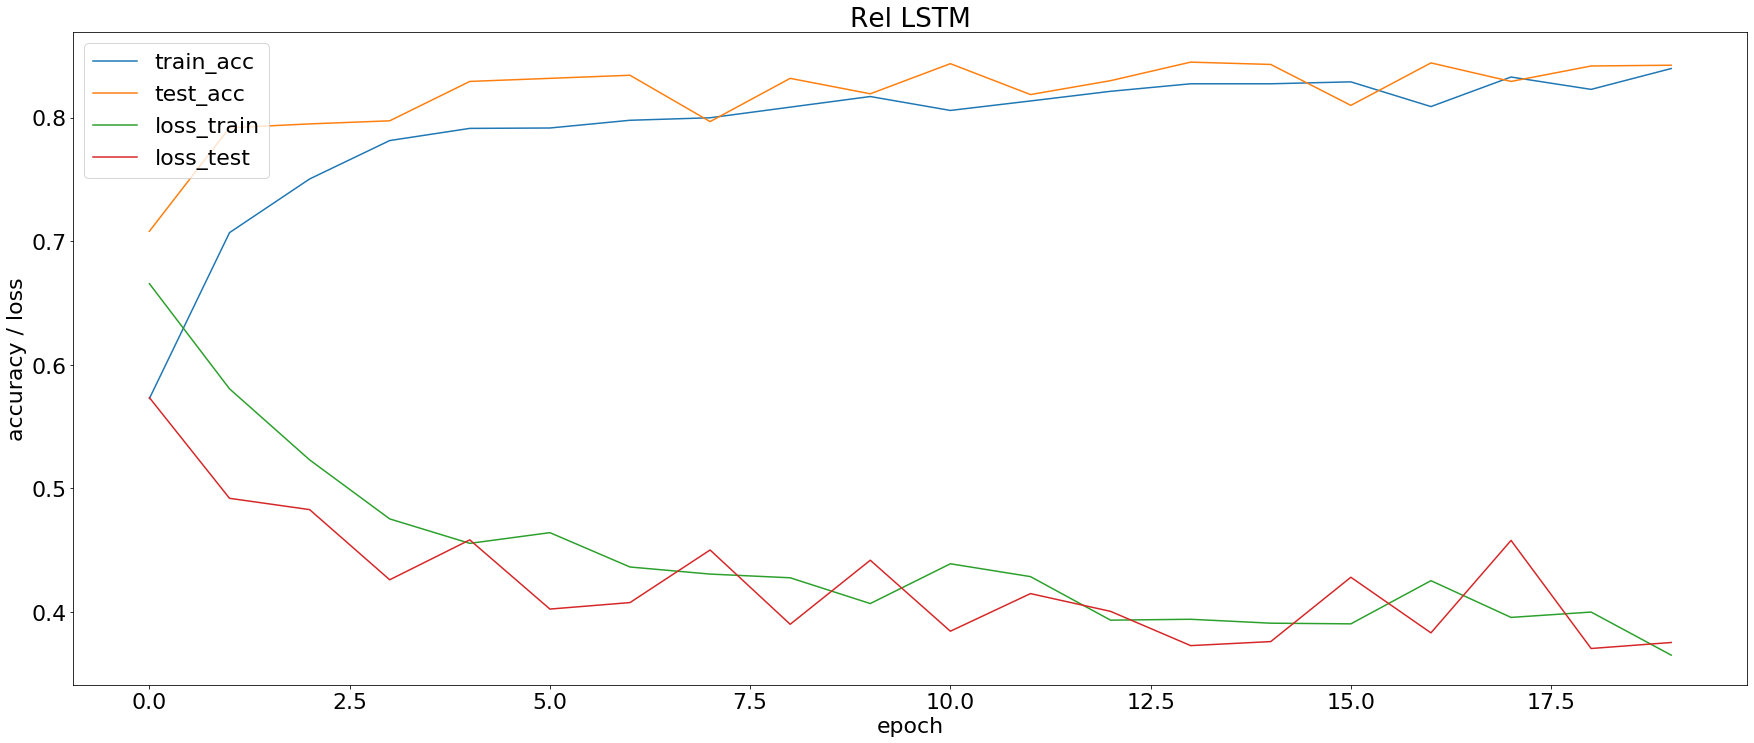

In [66]:
# Impresión de todos los modelos
import matplotlib.pyplot as plt

Redes = [history_dnn, history_cnn, history_lstm]
Nombres = ['Red DNN', 'Red CNN', 'Rel LSTM']

for red, nombre in zip(Redes, Nombres):
    # Definimos un tamaño para la figura que haremos
    plt.figure(figsize=(30, 12))
    plt.rcParams.update({'font.size': 22})
    
    plt.plot(red.history['acc'])
    plt.plot(red.history['val_acc'])
    plt.plot(red.history['loss'])
    plt.plot(red.history['val_loss'])

    plt.title(nombre)
    plt.ylabel('accuracy / loss')
    plt.xlabel('epoch')
    plt.legend(['train_acc','test_acc', 'loss_train', 'loss_test'], loc='upper left')
    plt.show()

In [82]:
instance = "Acabo de terminar esta película la vi en el estante de videos y, siendo fan de Nick Stahl, tuve que alquilarla. Con toda honestidad, probablemente debería haberse quedado en el estante. El concepto era interesante y hubo varios giros y vueltas bastante inteligentes, pero de alguna manera adiviné casi todos antes de que aparecieran. Y la película simplemente fue un poco demasiado lejos al final en mi opinión ... ¡si tienes que sufrir al verla, verás lo que quiero decir! En una nota positiva, Nick La actuación de Stahl fue genial (especialmente considerando con qué tuvo que trabajar). Eddie Kaye Thomas también fue bueno, pero siempre interpreta el mismo tipo de personaje ... demasiado Paul Finch de \"American Pie\" apareciendo para mi gusto. <br /> <br /> Y finalmente, la peor parte de esta película tiene que ser la actuación sin emociones de January Jones ... Supongo que una cara bonita es todo lo que importa en Hollywood."
#instance = "Pésima y terrible película, de lo peor que he visto"

instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

print('Modelo DNN')
print(model_dnn.predict(instance))

print('\nModelo CNN')
print(model_cnn.predict(instance))

print('\nModelo LSTM')
print(model_lstm.predict(instance))

Modelo DNN
[[0.88179207]]

Modelo CNN
[[0.1656892]]

Modelo LSTM
[[0.16132355]]
